# Model training

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, classification_report
from sklearn.metrics import confusion_matrix, classification_report


In [54]:
df = pd.read_csv("../data/prediction.csv", index_col=0, parse_dates=True)

In [55]:
df.dropna(inplace=True)

In [56]:
df.head()

,rsi_1000,rsi_rate_1000,rsi_10000,rsi_rate_10000,rsi_100000,rsi_rate_100000,arn_down_1000,arn_1000,arn_up_1000,arn_rate_1000,...,fi_rate_1000,fi_10000,fi_rate_10000,fi_100000,fi_rate_100000,vol,sc,side,random,target
2018-01-21 04:54:52.093,47.995242,-0.000611,50.130539,0.000007,50.017647,-1.432667e-06,100.0,-56.9,43.1,0.0338,...,-0.000158,-1.027775,-0.000111,0.930005,-0.000014,0.077123,-0.226214,0,0.243644,0
2018-01-21 07:43:11.308,47.105448,-0.001260,49.839001,-0.000039,49.994400,-1.194379e-06,100.0,-90.2,9.8,-0.0176,...,-0.001063,-2.258016,-0.000347,-0.147186,-0.000023,0.070080,-0.333075,0,0.901346,1
2018-01-21 11:43:58.068,51.246299,0.002189,50.139784,-0.000004,50.018387,-7.738765e-07,38.5,61.5,100.0,0.1288,...,0.006003,-0.751165,-0.000162,0.605440,-0.000014,0.067867,-0.184909,1,0.963670,0
2018-01-21 15:39:52.181,48.290945,-0.003168,49.881849,-0.000015,49.998268,-9.851569e-07,100.0,-85.4,14.6,-0.1484,...,-0.007196,-1.988354,-0.000128,-0.104446,-0.000022,0.064774,-0.163115,0,0.990349,1
2018-01-22 00:46:51.782,51.535596,0.002681,50.026256,-0.000050,50.005808,-1.203943e-06,11.9,88.1,100.0,0.0358,...,0.005917,0.769461,-0.000169,0.793178,-0.000013,0.065122,-0.108047,1,0.489860,0


In [57]:
X = df.drop(["target"], axis=1)
X.head(3)

,rsi_1000,rsi_rate_1000,rsi_10000,rsi_rate_10000,rsi_100000,rsi_rate_100000,arn_down_1000,arn_1000,arn_up_1000,arn_rate_1000,...,fi_1000,fi_rate_1000,fi_10000,fi_rate_10000,fi_100000,fi_rate_100000,vol,sc,side,random
2018-01-21 04:54:52.093,47.995242,-0.000611,50.130539,0.000007,50.017647,-1.432667e-06,100.0,-56.9,43.1,0.0338,...,-3.786329,-0.000158,-1.027775,-0.000111,0.930005,-0.000014,0.077123,-0.226214,0,0.243644
2018-01-21 07:43:11.308,47.105448,-0.001260,49.839001,-0.000039,49.994400,-1.194379e-06,100.0,-90.2,9.8,-0.0176,...,-3.977910,-0.001063,-2.258016,-0.000347,-0.147186,-0.000023,0.070080,-0.333075,0,0.901346
2018-01-21 11:43:58.068,51.246299,0.002189,50.139784,-0.000004,50.018387,-7.738765e-07,38.5,61.5,100.0,0.1288,...,3.334328,0.006003,-0.751165,-0.000162,0.605440,-0.000014,0.067867,-0.184909,1,0.963670


In [58]:
y = df.target
y

2018-01-21 04:54:52.093    0
2018-01-21 07:43:11.308    1
2018-01-21 11:43:58.068    0
2018-01-21 15:39:52.181    1
2018-01-22 00:46:51.782    0
                          ..
2021-06-19 06:00:23.589    1
2021-06-19 11:31:42.178    1
2021-06-19 12:15:48.165    0
2021-06-19 14:30:16.120    0
2021-06-19 16:20:11.162    0
Name: target, Length: 6087, dtype: int64

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.17,
                                                    shuffle=False)

In [60]:
n_estimators = 10000
model = RandomForestClassifier(max_depth=2, n_estimators=n_estimators,
                            criterion='entropy')
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=2, n_estimators=10000)

Text(-1.5, 0.5, 'Predicted label')

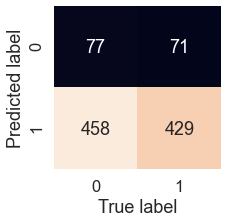

In [61]:
y_preds = model.predict(X_test)	

sns.set(font_scale = 1.5)
fig, ax = plt.subplots(figsize=(3, 3))
ax = sns.heatmap(confusion_matrix(y_preds, y_test),
                 annot=True,
                 cbar=False,
                 fmt='d')
plt.xlabel("True label")
plt.ylabel("Predicted label")

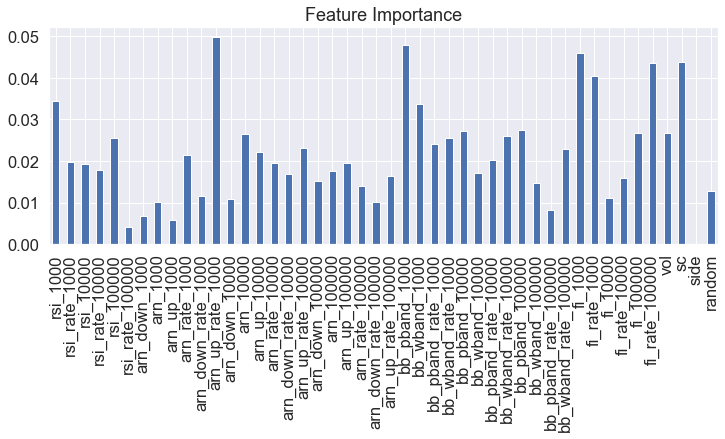

In [62]:
feature_dict = dict(zip(X_train.columns, list(model.feature_importances_)))
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False, figsize=(12, 4));

In [63]:
y_pred_rf = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_rf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.14      0.23       535
           1       0.48      0.86      0.62       500

    accuracy                           0.49      1035
   macro avg       0.50      0.50      0.42      1035
weighted avg       0.50      0.49      0.42      1035



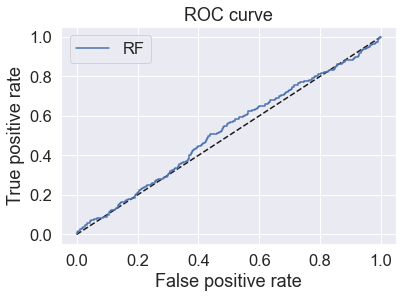

In [64]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

## Plotting

In [65]:
prices = pd.read_csv("../data/BTCUSDT-volume-bars.csv", index_col=0, parse_dates=True)

In [66]:
df.target

2018-01-21 04:54:52.093    0
2018-01-21 07:43:11.308    1
2018-01-21 11:43:58.068    0
2018-01-21 15:39:52.181    1
2018-01-22 00:46:51.782    0
                          ..
2021-06-19 06:00:23.589    1
2021-06-19 11:31:42.178    1
2021-06-19 12:15:48.165    0
2021-06-19 14:30:16.120    0
2021-06-19 16:20:11.162    0
Name: target, Length: 6087, dtype: int64

In [67]:
plot = df[-len(y_pred):].copy()
plot["close"] = prices.reindex(plot.index).close
plot["up"] = list(map(lambda x, c: c if x==1 else None, y_pred, plot.close))
plot["down"] = list(map(lambda x, c: c if x==0 else None, y_pred, plot.close))


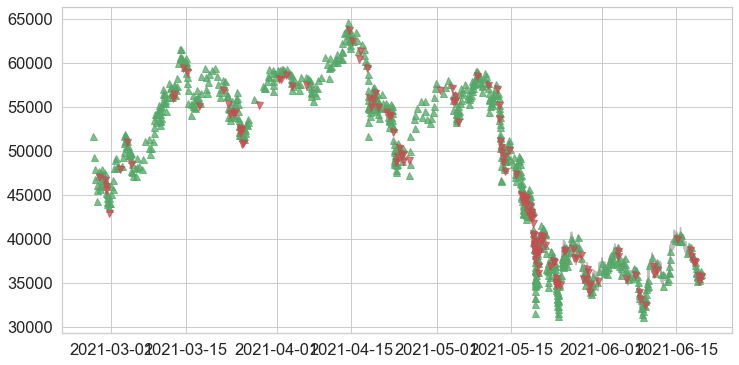

In [68]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(prices.close[-500000:], alpha=.5, color="gray")

ax.plot(plot.up, marker='^', markersize=7,
                     alpha=0.75, label='upcross', color='g', linewidth=0)

ax.plot(plot.down, marker='v', markersize=7,
                     alpha=0.75, label='upcross', color='r', linewidth=0)

In [18]:
y_test.value_counts()

0    822
1    660
Name: target, dtype: int64